### Exploratory data analysis

Несомненно, разведочный анализ данных — один из самых важных этапов в анализе, который, однако, часто пропускают. Но именно он может дать исследователю представление о том, насколько "хороши" его данные и подходят ли они для дальнейшего анализа.

In [2]:
#Подгрузка библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

Давайте загрузим наши данные. Сегодня мы будем анализировать известный набор данных о пассажирах, которые плыли на корабле "Титаник".

In [4]:
titanik_data = pd.read_csv('../../EDA Титаник/titanik_full_data.csv', sep = '\t')
titanik_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


В любом хорошем исследовании к данным прилагается легенда — описание переменных, которые будут использоваться в анализе и история сбора данных. В нашем случае она выглядит так:

__PassengerId__ — уникальный ID пассажира

__Survived__ — выжил пассажир или нет (0 - нет, 1 - да)

__Pclass__ — класс каюты (1 - 1-ый класс, 2 - 2-ой класс; 3 - 3-ий класс)

__Name__ — имя пассажира

__Sex__ — пол пассажира (male - мужской, female - женский)

__Age__ — возраст пассажира

__SibSp__ — количество братьев и сестер / супругов за границей 

__Parch__ — количество родителей / детей на борту

__Ticket__ — номер билета

__Fare__ — стоимость билета (британские фунты)

__Cabin__ — номер каюты

__Embarked__ — порт, в котором сел пассажир 

In [9]:
titanik_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [61]:
titanik_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [62]:
titanik_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


Теперь можно посмотреть на взаимодействие всех переменных со всеми (из-за большого количества факторных переменных это не всегда целесообразно делать)

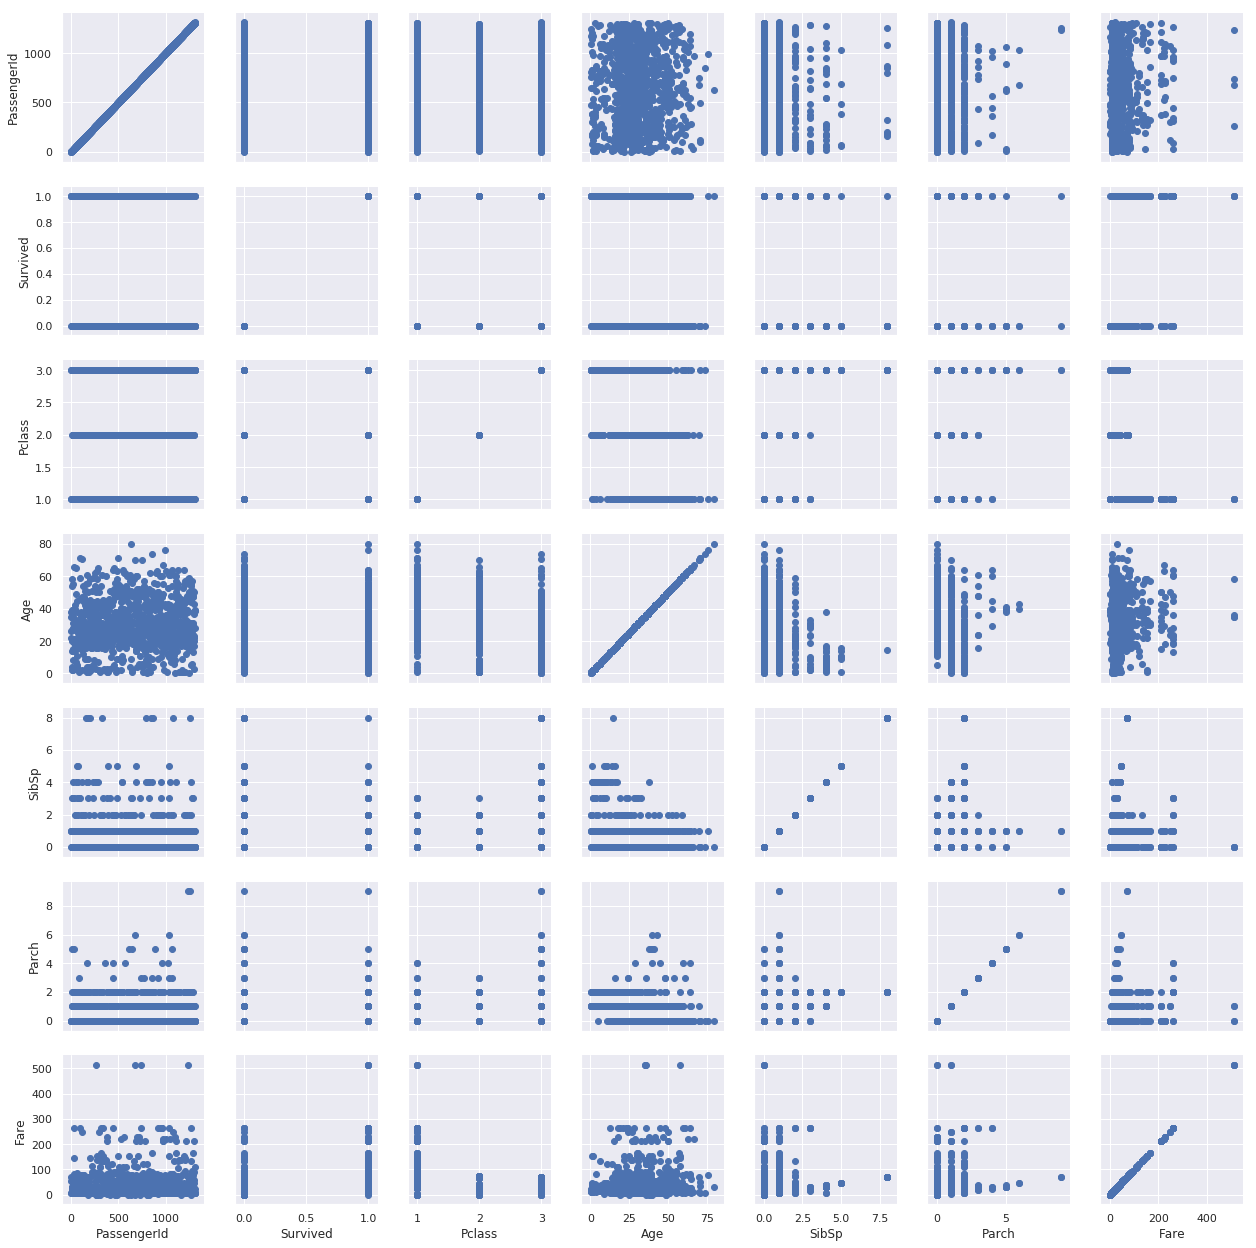

In [10]:
pair_grid_plot = sns.PairGrid(titanik_data)
pair_grid_plot.map(plt.scatter)

Уберем переменные, которые слишком оверпредставленны (больше количество факторов)

In [11]:
titanik_subset = titanik_data.copy()
titanik_subset.drop(['PassengerId','Name','Ticket', 'Cabin'],axis=1,inplace=True)

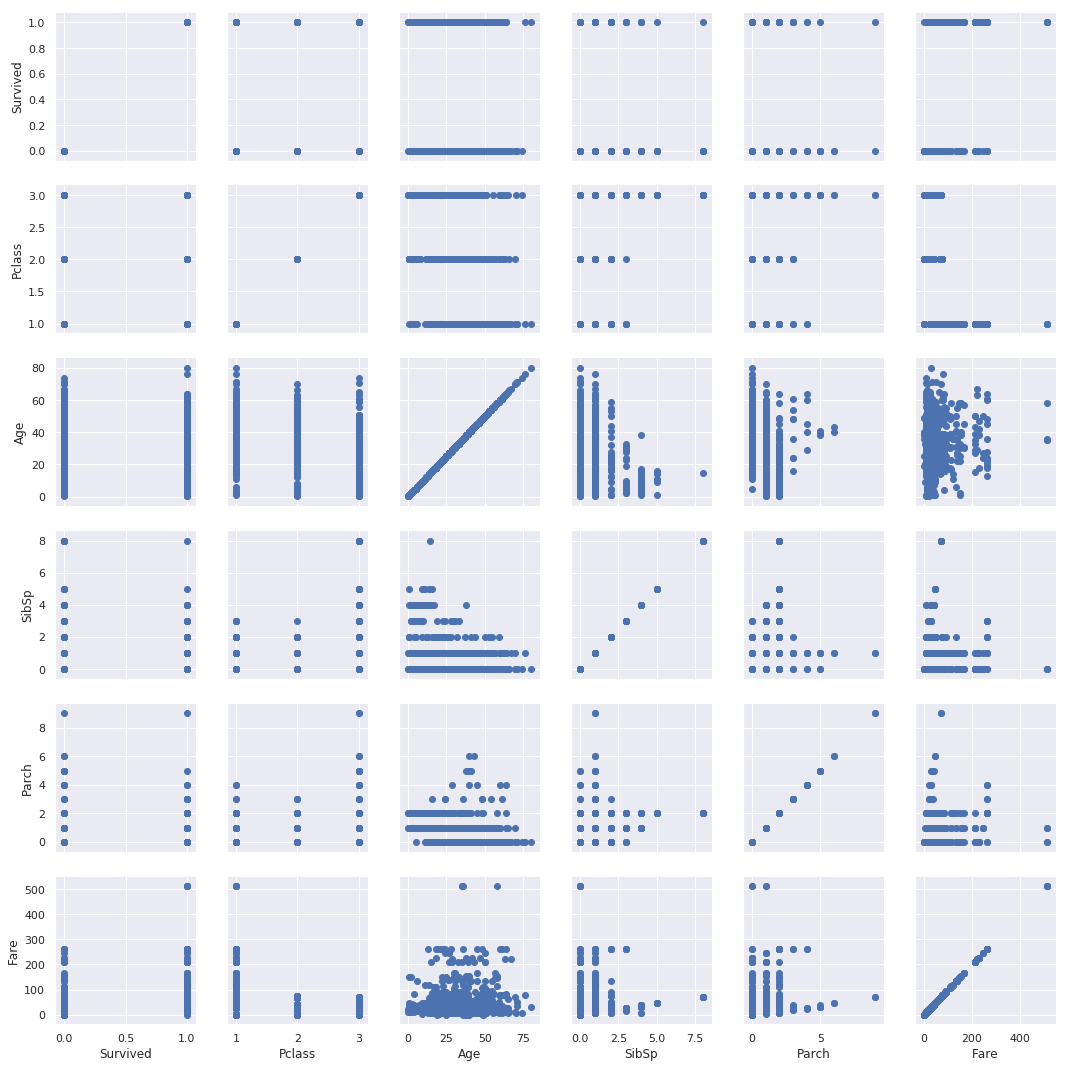

In [12]:
pair_grid_plot_1 = sns.PairGrid(titanik_subset)
pair_grid_plot_1.map(plt.scatter)

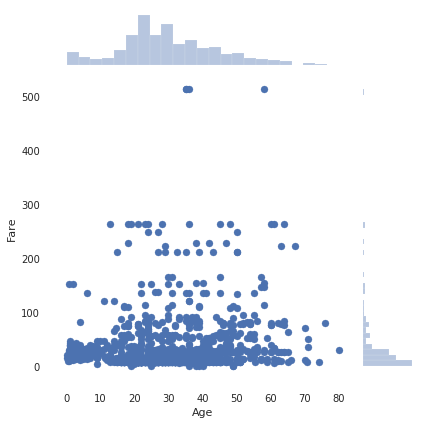

In [67]:
#Ради любопытства можно посмотреть как распределен возраст и стоимость билета. В приницпе эти графики достаточно информативны и позволяют посмотреть на распределение данных
sns.jointplot(x = 'Age', y = 'Fare', data = titanik_data)

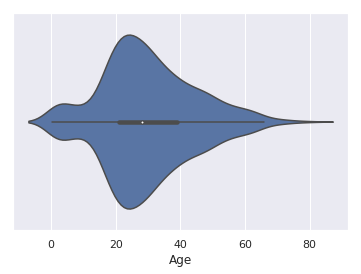

In [26]:
sns.violinplot(titanik_data['Age'])

Оценим, сколько всего пассажиров выжило на Титанике:

0.37738731856378915


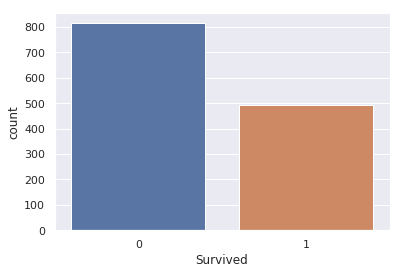

In [15]:
sns.countplot(x = 'Survived', data = titanik_data)

print(titanik_data.Survived.sum()/titanik_data.Survived.count())

Однако сразу хочется посмотреть, а влияет ли пол на выживаемость людей, тут могут быть 2 гипотезы

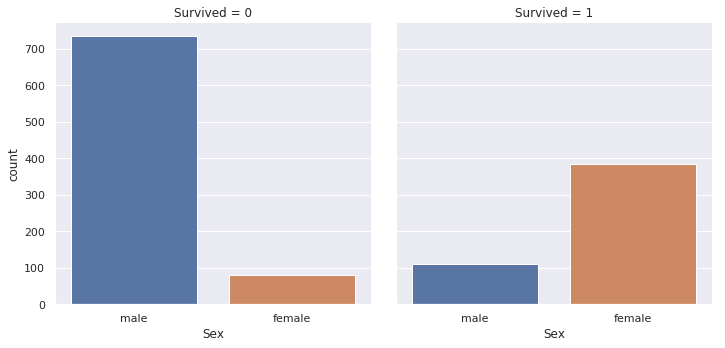

In [16]:
sns.catplot(x = 'Sex', col = 'Survived', kind = 'count', data = titanik_data)

In [17]:
titanik_data_ad = (titanik_data.groupby(['Sex'])['Survived']
 .value_counts(normalize=True).round(2)
 .to_frame('perc').reset_index()
)

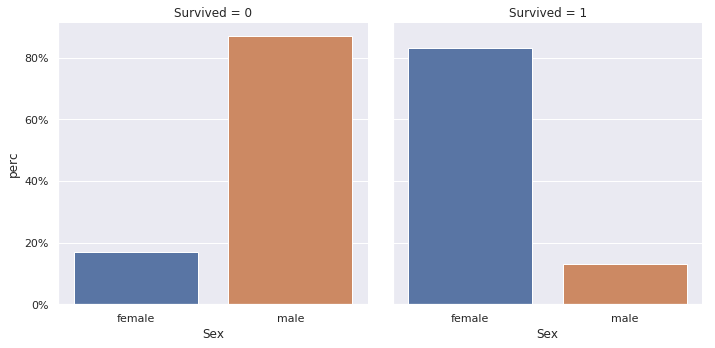

In [18]:
from  matplotlib.ticker import PercentFormatter
p = sns.catplot(x = 'Sex', y='perc', col = 'Survived', kind = 'bar', data = titanik_data_ad)
for ax in p.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter(1))

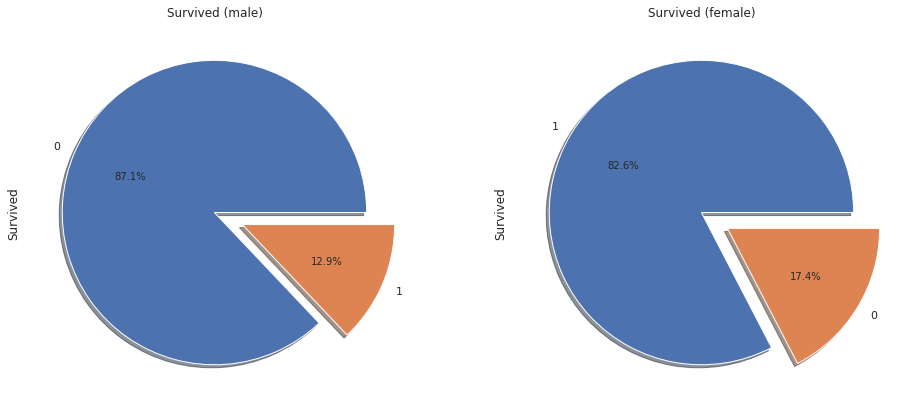

In [30]:
# На мой взгляд более наглядное представление распределения выживших
f,ax=plt.subplots(1,2,figsize=(16,7))
titanik_data['Survived'][titanik_data['Sex']=='male'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)
titanik_data['Survived'][titanik_data['Sex']=='female'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[0].set_title('Survived (male)')
ax[1].set_title('Survived (female)')

plt.show()



__Сводные таблицы__ нужны в том случае, если вы хотите проанализировать больше 2-х признаков за раз. 

In [19]:
pd.crosstab(titanik_data.Pclass, titanik_data.Survived, margins=True).style.background_gradient(cmap='autumn_r')

Survived,0,1,All
Pclass,,,
1,137,186,323
2,160,117,277
3,518,191,709
All,815,494,1309


In [20]:
print("% of survivals in") 
print("Pclass=1 : ", titanik_data.Survived[titanik_data.Pclass == 1].sum()/titanik_data[titanik_data.Pclass == 1].Survived.count())
print("Pclass=2 : ", titanik_data.Survived[titanik_data.Pclass == 2].sum()/titanik_data[titanik_data.Pclass == 2].Survived.count())
print("Pclass=3 : ", titanik_data.Survived[titanik_data.Pclass == 3].sum()/titanik_data[titanik_data.Pclass == 3].Survived.count())

% of survivals in
Pclass=1 :  0.5758513931888545
Pclass=2 :  0.4223826714801444
Pclass=3 :  0.2693935119887165


Посмотрим на распределение того, как менялась доля выживших в зависимости от класса кают

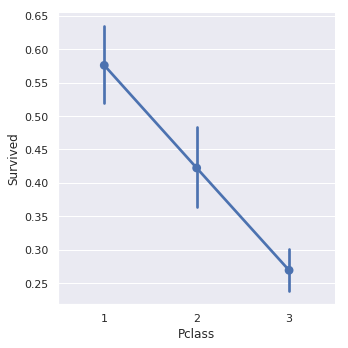

In [21]:
sns.catplot('Pclass','Survived', kind = 'point', data = titanik_data)

In [22]:
pd.crosstab([titanik_data.Sex, titanik_data.Survived], titanik_data.Pclass, margins = True).style.background_gradient(cmap = 'autumn_r')

Добавим к этому анализу ещё и пол пассажиров

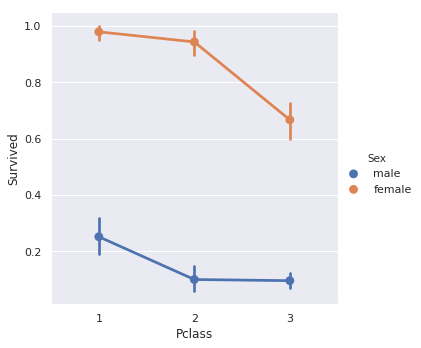

In [23]:
sns.catplot('Pclass','Survived',hue = 'Sex', kind = 'point', data = titanik_data)

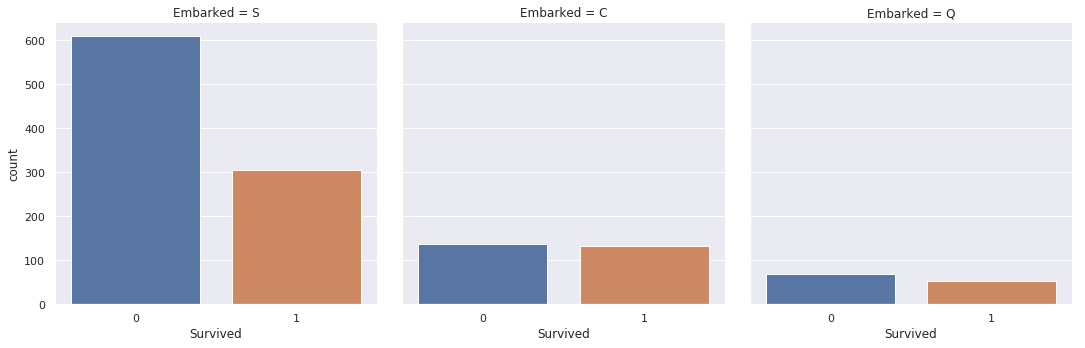

In [27]:
sns.catplot(x='Survived', col='Embarked', kind='count', data=titanik_data)

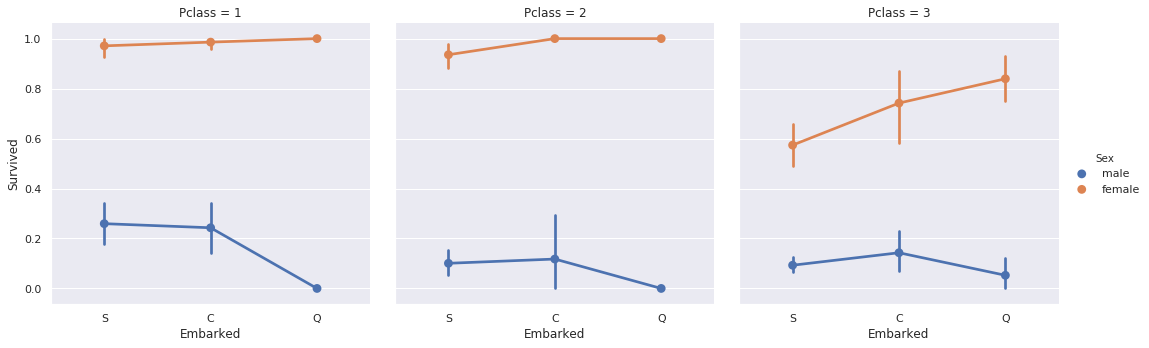

In [28]:
sns.catplot('Embarked','Survived', col='Pclass', hue= 'Sex', kind='point', data = titanik_data)

In [30]:
pd.crosstab([titanik_data.Survived], [titanik_data.Sex, titanik_data.Pclass, titanik_data.Embarked], margins=True).style.background_gradient(cmap = 'autumn_r')

In [31]:
titanik_data['Age_bin'] = np.nan
for i in range(8,0,-1):
    titanik_data.loc[titanik_data['Age'] <= i*10, 'Age_bin'] = i

print(titanik_data[['Age' , 'Age_bin']].head(10))

    Age  Age_bin
0  22.0      3.0
1  38.0      4.0
2  26.0      3.0
3  35.0      4.0
4  35.0      4.0
5   NaN      NaN
6  54.0      6.0
7   2.0      1.0
8  27.0      3.0
9  14.0      2.0


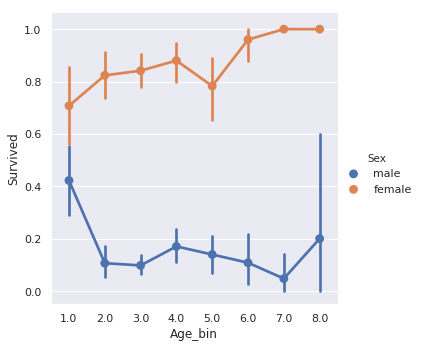

In [32]:
sns.catplot('Age_bin','Survived',hue='Sex',kind='point',data = titanik_data)

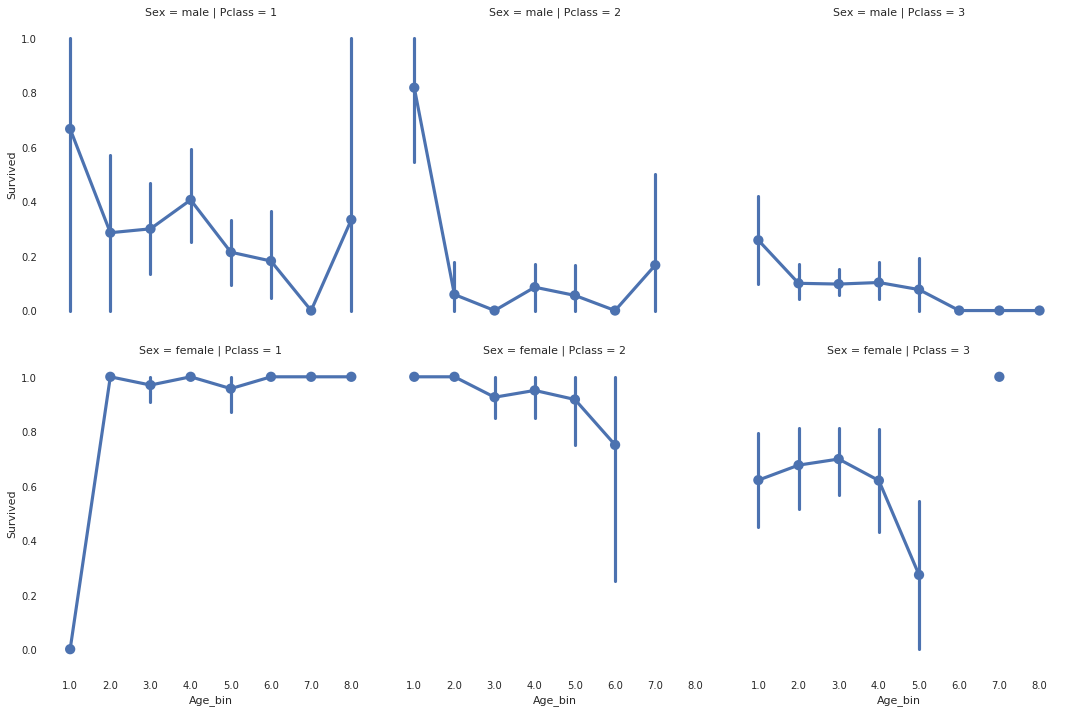

In [42]:
sns.catplot('Age_bin','Survived', col = 'Pclass' , row = 'Sex', kind = 'point', data = titanik_data);

In [34]:
pd.crosstab([titanik_data.Sex, titanik_data.Survived], [titanik_data.Age_bin, titanik_data.Pclass], margins=True).style.background_gradient(cmap='autumn_r')

In [35]:
titanik_data['Fare_bin'] = np.nan
for i in range(12,0,-1):
        titanik_data.loc[titanik_data['Fare'] <= i*50, 'Fare_bin'] = i

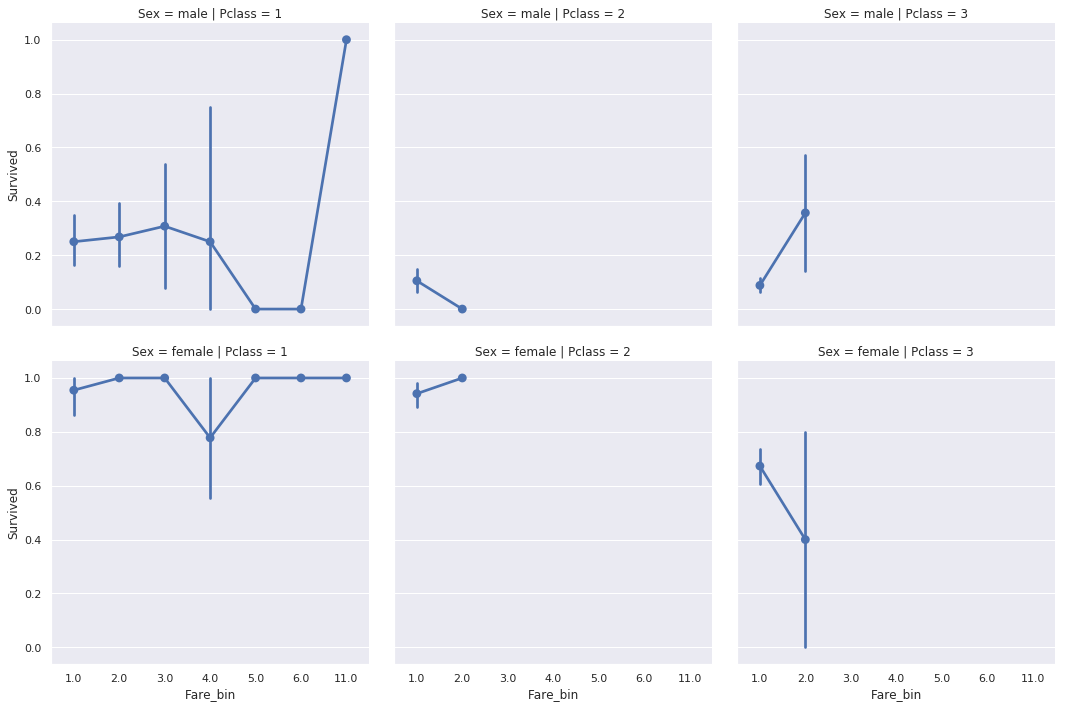

In [36]:
sns.catplot('Fare_bin','Survived', col='Pclass' , row = 'Sex', kind='point', data=titanik_data)

In [38]:
pd.crosstab([titanik_data.Sex, titanik_data.Survived], [titanik_data.Fare_bin, titanik_data.Pclass], margins=True).style.background_gradient(cmap='autumn_r')

In [39]:
titanik_data_1 = titanik_data.copy()

titanik_data_1 = pd.get_dummies(titanik_data_1, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)
titanik_data_1.drop(['PassengerId','Name','Ticket', 'Cabin', 'Age_bin', 'Fare_bin'],axis=1,inplace=True)
titanik_data_1.dropna(inplace=True)

Теперь можно посмотреть на корреляцию всех перемнных со всеми и уже по такой матрице можно делать первые выводы о том, какие перемнные могут быть важны в анализе.

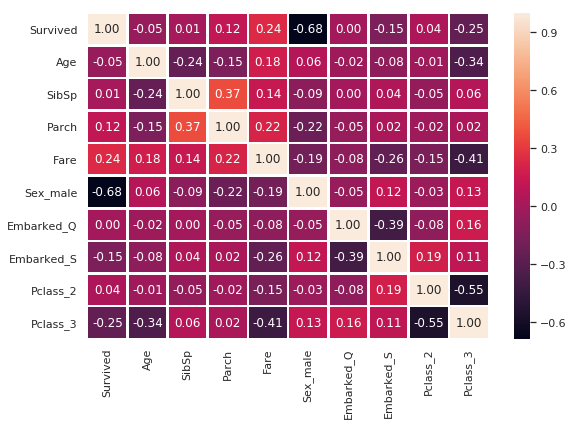

In [40]:
corr = titanik_data_1.corr()

f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr, annot = True, linewidths=1.5 , fmt = '.2f',ax=ax)
plt.show()

In [5]:
from pandas_profiling import ProfileReport
profile = ProfileReport(titanik_data, title = 'Pandas Profiling Report')
profile

Ссылка на видео [тут](https://youtu.be/wKrsanSXzk0)